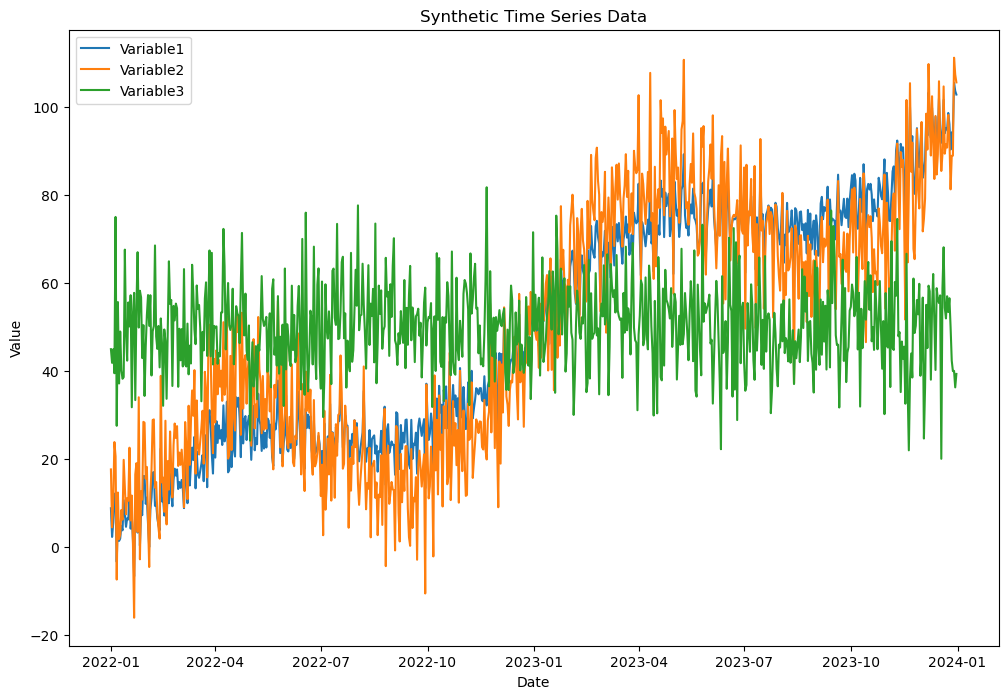

Variable: Variable1
Root Mean Squared Error (RMSE): 13.485890872197283
Mean Absolute Error (MAE): 10.389705484255336


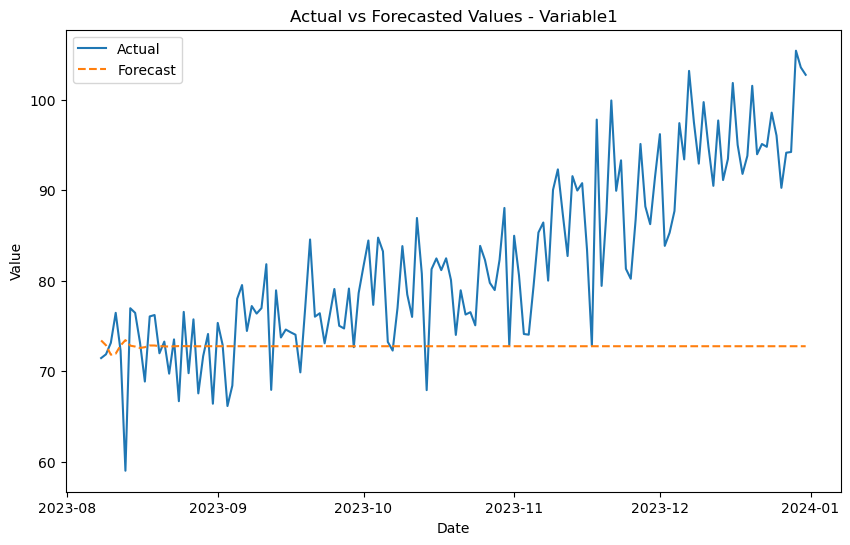

Variable: Variable2
Root Mean Squared Error (RMSE): 17.05005583327275
Mean Absolute Error (MAE): 12.919158278718033


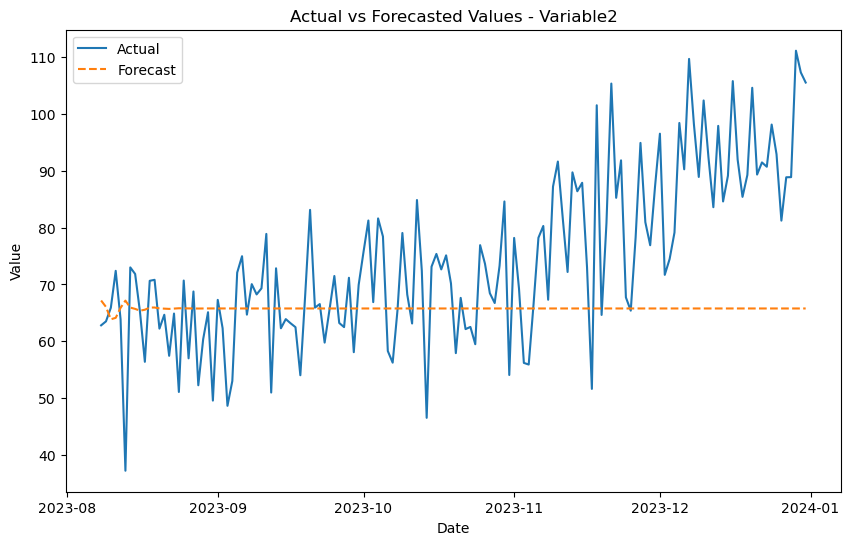

Variable: Variable3
Root Mean Squared Error (RMSE): 10.251042395779361
Mean Absolute Error (MAE): 8.312772503749066


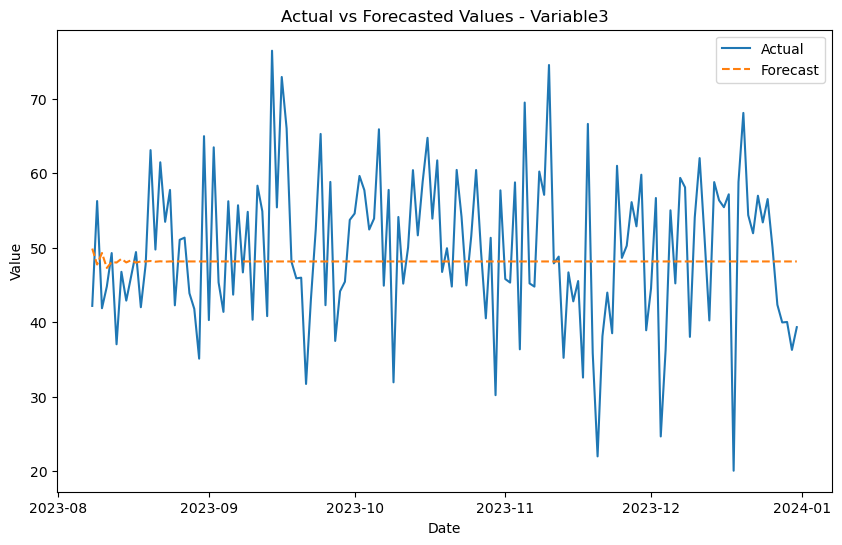

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate synthetic time series data with multiple variables
np.random.seed(0)
date_range = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')

# Variables with complex relationships
trend = np.linspace(0, 100, len(date_range))  # Linear trend
seasonality = 10 * np.sin(np.arange(len(date_range)) * (2 * np.pi) / 365)  # Seasonality
noise = np.random.normal(loc=0, scale=5, size=len(date_range))  # Random noise

# Create additional variables
variable1 = trend + seasonality + noise
variable2 = trend + 2 * seasonality + 2 * noise
variable3 = np.random.normal(loc=50, scale=10, size=len(date_range))  # Random variable

# Create DataFrame
data = pd.DataFrame({'Date': date_range, 'Variable1': variable1, 'Variable2': variable2, 'Variable3': variable3})

# Visualize the synthetic time series data
plt.figure(figsize=(12, 8))
plt.plot(data['Date'], data['Variable1'], label='Variable1')
plt.plot(data['Date'], data['Variable2'], label='Variable2')
plt.plot(data['Date'], data['Variable3'], label='Variable3')
plt.title('Synthetic Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Define ARIMA model for each variable and perform forecasting
for variable in ['Variable1', 'Variable2', 'Variable3']:
    try:
        # Define ARIMA model
        model = ARIMA(train_data[variable], order=(5, 1, 0))  # Example order, you can tune this
        model_fit = model.fit()

        # Forecast
        forecast_values = model_fit.forecast(steps=len(test_data))

        # Calculate RMSE and MAE
        rmse = np.sqrt(mean_squared_error(test_data[variable], forecast_values))
        mae = mean_absolute_error(test_data[variable], forecast_values)

        print(f"Variable: {variable}")
        print("Root Mean Squared Error (RMSE):", rmse)
        print("Mean Absolute Error (MAE):", mae)

        # Visualize actual vs forecasted values
        plt.figure(figsize=(10, 6))
        plt.plot(test_data['Date'], test_data[variable], label='Actual')
        plt.plot(test_data['Date'], forecast_values, label='Forecast', linestyle='--')
        plt.title(f'Actual vs Forecasted Values - {variable}')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Error occurred for variable {variable}: {e}")
